In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Load the dataset
file_path = '/content/zomato_restaurants_in_India.csv'
zomato_data = pd.read_csv(file_path)

# Display the first few rows of the dataset
zomato_data.head()

,res_id,name,establishment,url,address,city,city_id,locality,latitude,longitude,...,price_range,currency,highlights,aggregate_rating,rating_text,votes,photo_count,opentable_support,delivery,takeaway
0,3400299,Bikanervala,['Quick Bites'],https://www.zomato.com/agra/bikanervala-khanda...,"Kalyani Point, Near Tulsi Cinema, Bypass Road,...",Agra,34,Khandari,27.211450,78.002381,...,2,Rs.,"['Lunch', 'Takeaway Available', 'Credit Card',...",4.4,Very Good,814,154,0.0,-1,-1
1,3400005,Mama Chicken Mama Franky House,['Quick Bites'],https://www.zomato.com/agra/mama-chicken-mama-...,"Main Market, Sadar Bazaar, Agra Cantt, Agra",Agra,34,Agra Cantt,27.160569,78.011583,...,2,Rs.,"['Delivery', 'No Alcohol Available', 'Dinner',...",4.4,Very Good,1203,161,0.0,-1,-1
2,3401013,Bhagat Halwai,['Quick Bites'],https://www.zomato.com/agra/bhagat-halwai-2-sh...,"62/1, Near Easy Day, West Shivaji Nagar, Goalp...",Agra,34,Shahganj,27.182938,77.979684,...,1,Rs.,"['No Alcohol Available', 'Dinner', 'Takeaway A...",4.2,Very Good,801,107,0.0,1,-1
3,3400290,Bhagat Halwai,['Quick Bites'],https://www.zomato.com/agra/bhagat-halwai-civi...,"Near Anjana Cinema, Nehru Nagar, Civil Lines, ...",Agra,34,Civil Lines,27.205668,78.004799,...,1,Rs.,"['Takeaway Available', 'Credit Card', 'Lunch',...",4.3,Very Good,693,157,0.0,1,-1
4,3401744,The Salt Cafe Kitchen & Bar,['Casual Dining'],https://www.zomato.com/agra/the-salt-cafe-kitc...,"1C,3rd Floor, Fatehabad Road, Tajganj, Agra",Agra,34,Tajganj,27.157709,78.052421,...,3,Rs.,"['Lunch', 'Serves Alcohol', 'Cash', 'Credit Ca...",4.9,Excellent,470,291,0.0,1,-1


In [3]:
# Data cleaning and preparation

# Checking for missing values
missing_values = zomato_data.isnull().sum()

# Checking for duplicates
duplicate_rows = zomato_data.duplicated().sum()

# Checking data types
data_types = zomato_data.dtypes

missing_values, duplicate_rows, data_types


(res_id                       0
 name                         0
 establishment                0
 url                          0
 address                    134
 city                         0
 city_id                      0
 locality                     0
 latitude                     0
 longitude                    0
 zipcode                 163187
 country_id                   0
 locality_verbose             0
 cuisines                  1391
 timings                   3874
 average_cost_for_two         0
 price_range                  0
 currency                     0
 highlights                   0
 aggregate_rating             0
 rating_text                  0
 votes                        0
 photo_count                  0
 opentable_support           48
 delivery                     0
 takeaway                     0
 dtype: int64,
 151527,
 res_id                    int64
 name                     object
 establishment            object
 url                      object
 address    

In [4]:
# Handling missing values
zomato_cleaned = zomato_data.copy()
zomato_cleaned['address'].fillna('Unknown', inplace=True)
zomato_cleaned['cuisines'].fillna('Unknown', inplace=True)
zomato_cleaned['timings'].fillna('Unknown', inplace=True)
zomato_cleaned.drop(columns=['zipcode'], inplace=True)  # Dropping zipcode due to high number of missing values
zomato_cleaned['opentable_support'].fillna(0, inplace=True)  # Assuming 0 for missing opentable_support

# Removing duplicate rows
zomato_cleaned.drop_duplicates(inplace=True)

# Converting data types
zomato_cleaned['establishment'] = zomato_cleaned['establishment'].astype('category')

# Checking the dataset after cleaning
zomato_cleaned_info = {
    "Shape after cleaning": zomato_cleaned.shape,
    "Missing values after cleaning": zomato_cleaned.isnull().sum().sum(),  # Total missing values
    "Data types after conversion": zomato_cleaned.dtypes
}

zomato_cleaned_info


{'Shape after cleaning': (60411, 25),
 'Missing values after cleaning': 0,
 'Data types after conversion': res_id                     int64
 name                      object
 establishment           category
 url                       object
 address                   object
 city                      object
 city_id                    int64
 locality                  object
 latitude                 float64
 longitude                float64
 country_id                 int64
 locality_verbose          object
 cuisines                  object
 timings                   object
 average_cost_for_two       int64
 price_range                int64
 currency                  object
 highlights                object
 aggregate_rating         float64
 rating_text               object
 votes                      int64
 photo_count                int64
 opentable_support        float64
 delivery                   int64
 takeaway                   int64
 dtype: object}

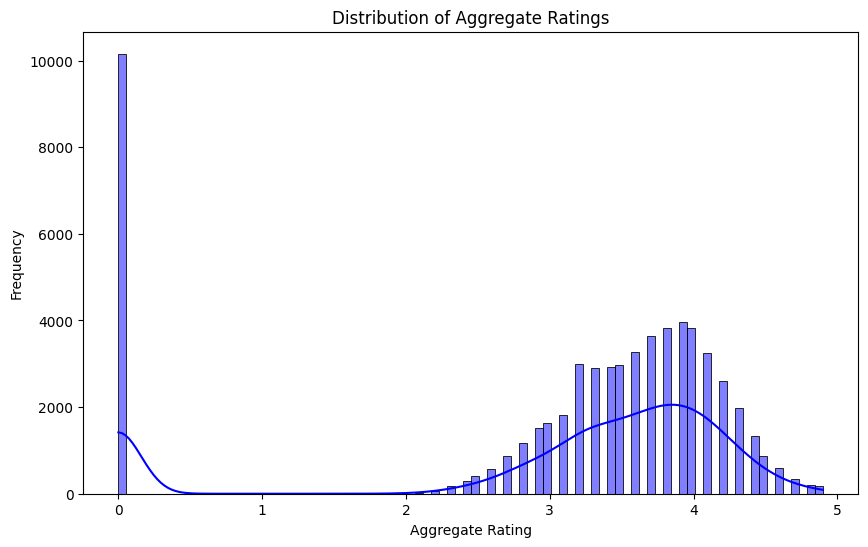

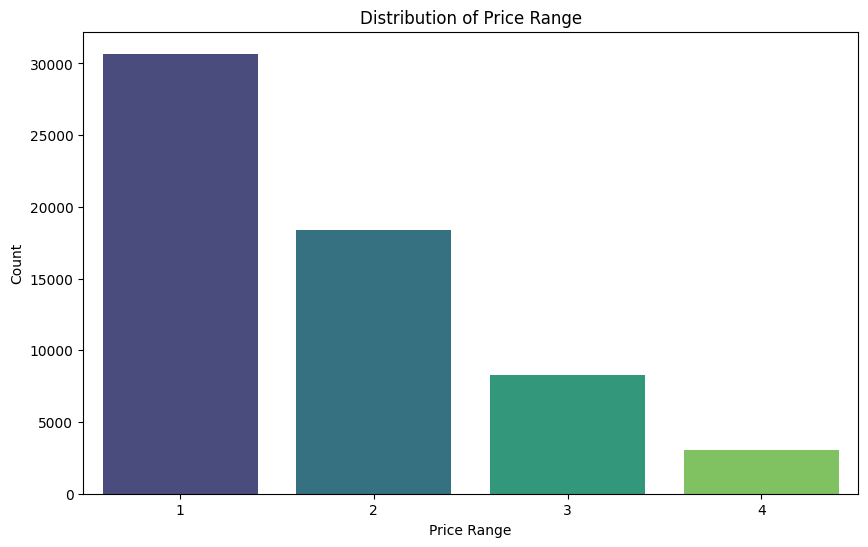

(             res_id       city_id      latitude     longitude  country_id  \
 count  6.041100e+04  60411.000000  60411.000000  60411.000000     60411.0   
 mean   1.309279e+07   3417.519376     21.349912     76.587636         1.0   
 std    8.133021e+06   5179.013230     41.190015     10.600963         0.0   
 min    5.000000e+01      1.000000      0.000000      0.000000         1.0   
 25%    3.000479e+06      7.000000     16.323783     74.653081         1.0   
 50%    1.869150e+07     26.000000     22.320915     77.134838         1.0   
 75%    1.886668e+07  11295.000000     26.744393     79.928133         1.0   
 max    1.915979e+07  11354.000000  10000.000000     91.832769         1.0   
 
        average_cost_for_two   price_range  aggregate_rating         votes  \
 count           60411.00000  60411.000000      60411.000000  60411.000000   
 mean              538.31246      1.730844          3.032863    261.587062   
 std               593.86415      0.880470          1.440739  

In [5]:

# Descriptive statistics for numerical columns
numerical_stats = zomato_cleaned.describe()

# Descriptive statistics for categorical columns
categorical_stats = zomato_cleaned.describe(include=['category', 'object'])

# Initial visualizations
# Distribution of Ratings
plt.figure(figsize=(10, 6))
sns.histplot(zomato_cleaned['aggregate_rating'], kde=True, color='blue')
plt.title('Distribution of Aggregate Ratings')
plt.xlabel('Aggregate Rating')
plt.ylabel('Frequency')

# Distribution of Price Range
plt.figure(figsize=(10, 6))
sns.countplot(x='price_range', data=zomato_cleaned, palette='viridis')
plt.title('Distribution of Price Range')
plt.xlabel('Price Range')
plt.ylabel('Count')

numerical_stats, categorical_stats, plt.show()


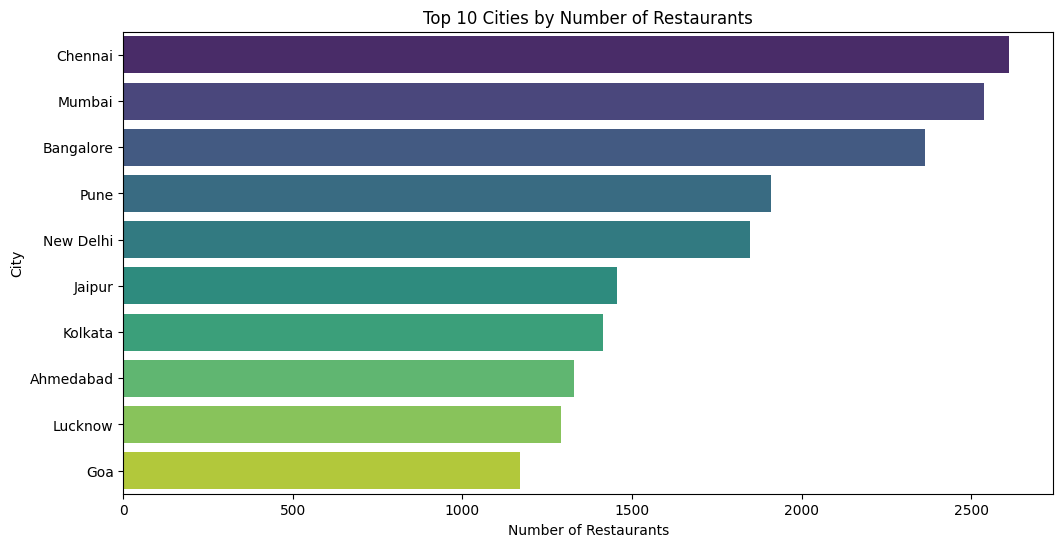

(         city  Number_of_Restaurants  Average_Rating  Average_Cost_for_Two  \
 12    Chennai                   2612        3.667764            708.369066   
 56     Mumbai                   2538        3.795863           1101.773050   
 8   Bangalore                   2365        3.729641            811.602537   
 74       Pune                   1911        3.534223            753.095238   
 66  New Delhi                   1847        3.770005           1018.305360   
 34     Jaipur                   1456        3.466209            716.222527   
 46    Kolkata                   1413        3.767233            707.147912   
 1   Ahmedabad                   1329        3.266591            506.629044   
 48    Lucknow                   1290        3.407597            513.120155   
 22        Goa                   1169        3.051326            798.828058   
 
     Average_Price_Range  
 12             1.806662  
 56             2.257289  
 8              1.964905  
 74             1.908

In [6]:
# Geographical Analysis
# Analyzing the number of restaurants in each city and their average ratings

# Grouping data by city
city_grouped = zomato_cleaned.groupby('city').agg(
    Number_of_Restaurants=pd.NamedAgg(column='name', aggfunc='count'),
    Average_Rating=pd.NamedAgg(column='aggregate_rating', aggfunc='mean'),
    Average_Cost_for_Two=pd.NamedAgg(column='average_cost_for_two', aggfunc='mean'),
    Average_Price_Range=pd.NamedAgg(column='price_range', aggfunc='mean')
).reset_index()

# Sorting based on the number of restaurants
city_grouped_sorted = city_grouped.sort_values(by='Number_of_Restaurants', ascending=False)

# Top 10 cities by number of restaurants
top_10_cities = city_grouped_sorted.head(10)

# Visualization
plt.figure(figsize=(12, 6))
sns.barplot(x='Number_of_Restaurants', y='city', data=top_10_cities, palette='viridis')
plt.title('Top 10 Cities by Number of Restaurants')
plt.xlabel('Number of Restaurants')
plt.ylabel('City')

top_10_cities, plt.show()


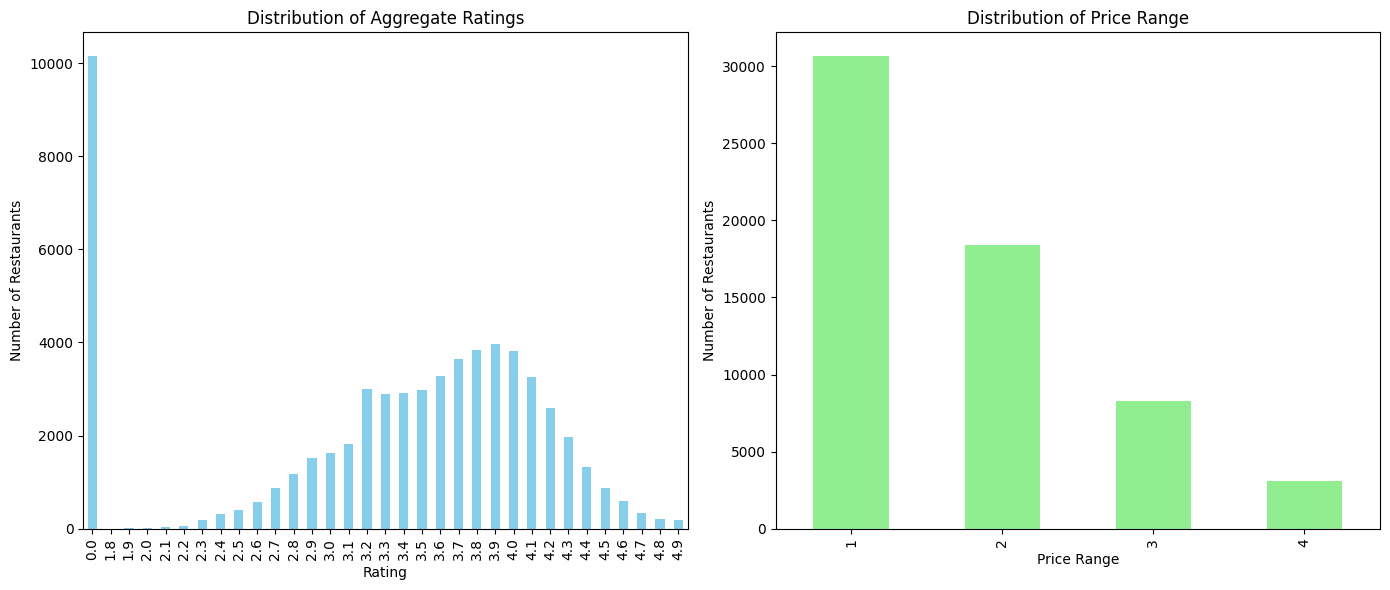

North Indian             4587
Fast Food                2137
North Indian, Chinese    1720
Bakery                   1618
South Indian             1598
Street Food              1221
Cafe                     1180
Mithai                   1032
Desserts                  950
Bakery, Desserts          872
Name: cuisines, dtype: int64

In [14]:
# Competitive Analysis
# Analyzing distribution of ratings, price range, and popular cuisines

# Distribution of Ratings
rating_distribution = zomato_cleaned['aggregate_rating'].value_counts().sort_index()

# Distribution of Price Range
price_range_distribution = zomato_cleaned['price_range'].value_counts().sort_index()

# Most Popular Cuisines
top_cuisines = zomato_cleaned['cuisines'].value_counts().head(10)

# Visualizations
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
rating_distribution.plot(kind='bar', color='skyblue')
plt.title('Distribution of Aggregate Ratings')
plt.xlabel('Rating')
plt.ylabel('Number of Restaurants')

plt.subplot(1, 2, 2)
price_range_distribution.plot(kind='bar', color='lightgreen')
plt.title('Distribution of Price Range')
plt.xlabel('Price Range')
plt.ylabel('Number of Restaurants')

plt.tight_layout()
plt.show()

# Display top cuisines
top_cuisines


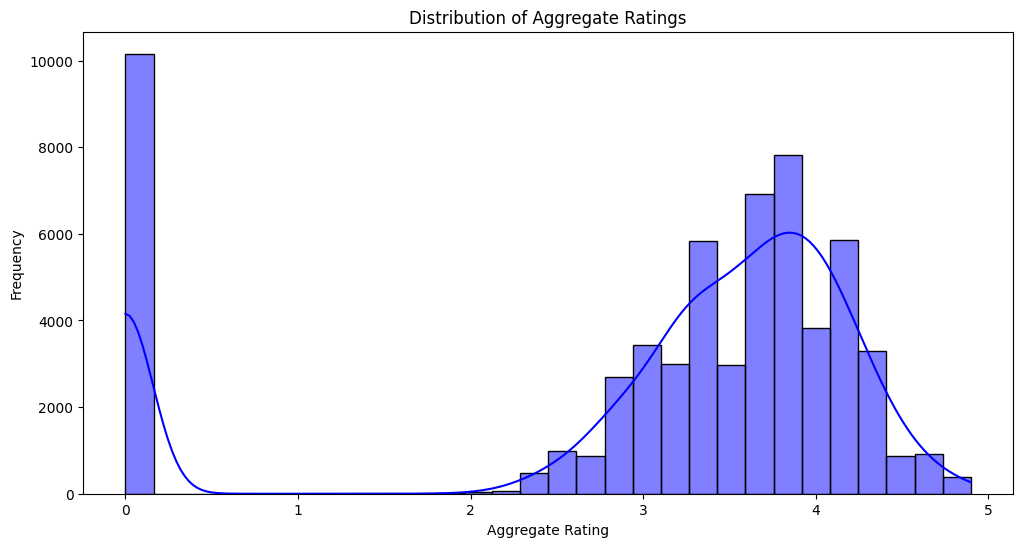

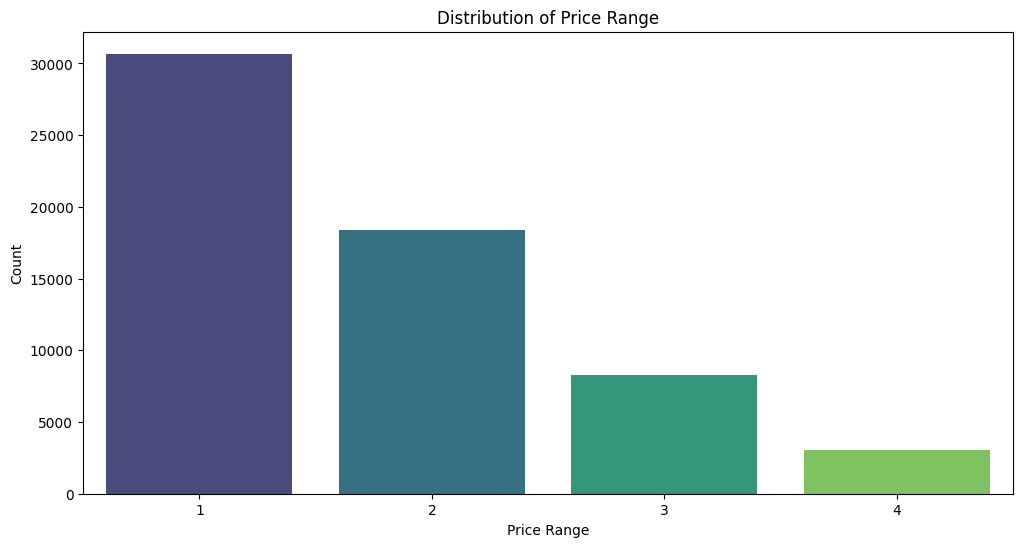

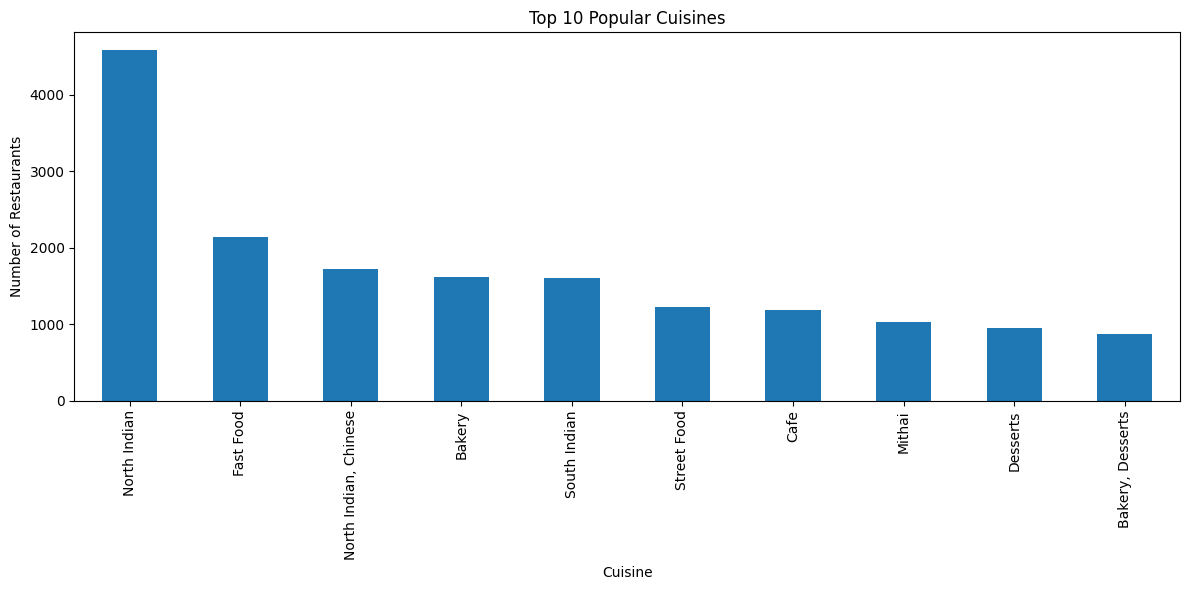

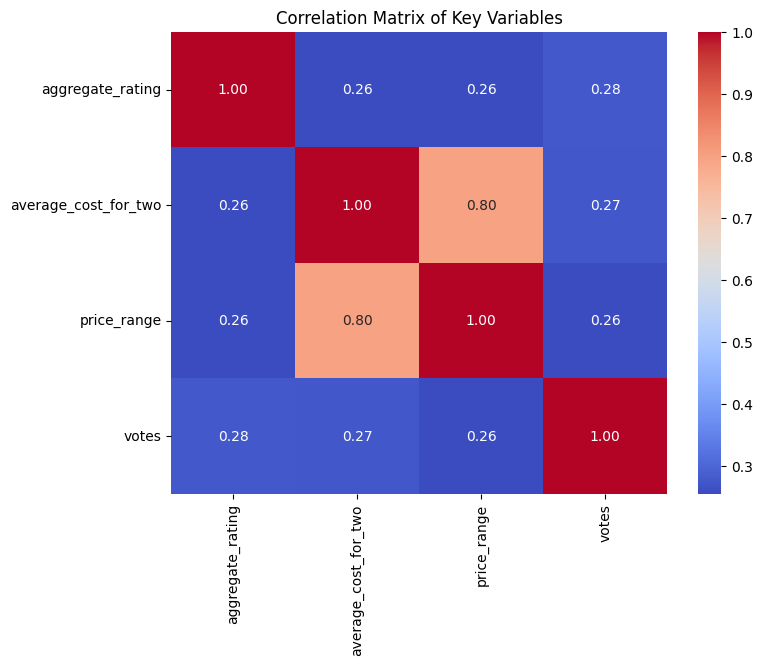

In [15]:
# Distribution Analysis for Ratings, Price Range, and Cuisines

# Replotting Distribution of Aggregate Ratings for clarity
plt.figure(figsize=(12, 6))
sns.histplot(zomato_cleaned['aggregate_rating'], kde=True, bins=30, color='blue')
plt.title('Distribution of Aggregate Ratings')
plt.xlabel('Aggregate Rating')
plt.ylabel('Frequency')

# Replotting Distribution of Price Range for clarity
plt.figure(figsize=(12, 6))
sns.countplot(x='price_range', data=zomato_cleaned, palette='viridis')
plt.title('Distribution of Price Range')
plt.xlabel('Price Range')
plt.ylabel('Count')

# Displaying the distribution of Top 10 Cuisines
plt.figure(figsize=(12, 6))
top_cuisines.plot(kind='bar')
plt.title('Top 10 Popular Cuisines')
plt.xlabel('Cuisine')
plt.ylabel('Number of Restaurants')

plt.tight_layout()
plt.show()

# Correlation Analysis
# Selecting relevant numerical columns for correlation
numerical_columns = ['aggregate_rating', 'average_cost_for_two', 'price_range', 'votes']
correlation_matrix = zomato_cleaned[numerical_columns].corr()

# Visualization of correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Key Variables')
plt.show()


,Most_Common_Cuisine,Average_Rating,Average_Cost_for_Two,Average_Price_Range
city,,,,
Chennai,South Indian,3.667764,708.369066,1.806662
Mumbai,"Bakery, Desserts",3.795863,1101.773050,2.257289
Bangalore,South Indian,3.729641,811.602537,1.964905
Pune,North Indian,3.534223,753.095238,1.908948
New Delhi,North Indian,3.770005,1018.305360,2.103952
Jaipur,North Indian,3.466209,716.222527,1.767170
Kolkata,Mishti,3.767233,707.147912,1.805379
Ahmedabad,Street Food,3.266591,506.629044,1.835214
Lucknow,North Indian,3.407597,513.120155,1.841085


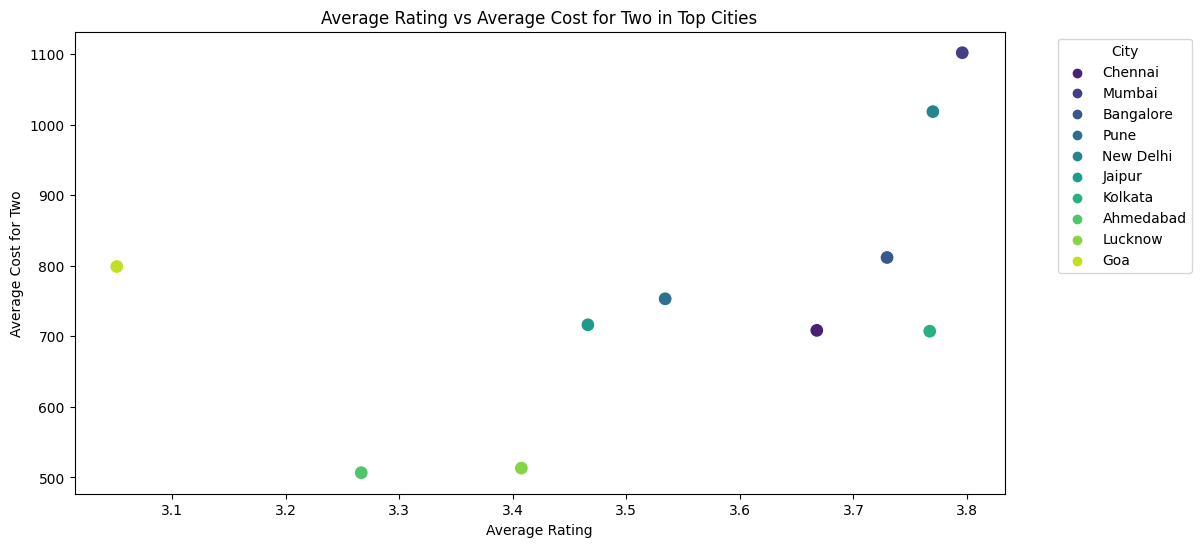

In [8]:
# Regional Analysis: Trends and Preferences across Different Cities

# Grouping data by city for detailed analysis
city_detailed_grouped = zomato_cleaned.groupby('city').agg(
    Average_Rating=pd.NamedAgg(column='aggregate_rating', aggfunc='mean'),
    Average_Cost_for_Two=pd.NamedAgg(column='average_cost_for_two', aggfunc='mean'),
    Average_Price_Range=pd.NamedAgg(column='price_range', aggfunc='mean'),
    Most_Common_Cuisine=pd.NamedAgg(column='cuisines', aggfunc=lambda x:x.value_counts().index[0]),
    Total_Restaurants=pd.NamedAgg(column='name', aggfunc='count')
).sort_values(by='Total_Restaurants', ascending=False)

# Selecting top cities for a more focused analysis
top_cities_detailed = city_detailed_grouped.head(10)

# Visualization: Comparing Average Ratings and Average Cost for Two in Top Cities
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Average_Rating', y='Average_Cost_for_Two', hue='city', data=top_cities_detailed, palette='viridis', s=100)
plt.title('Average Rating vs Average Cost for Two in Top Cities')
plt.xlabel('Average Rating')
plt.ylabel('Average Cost for Two')
plt.legend(title='City', bbox_to_anchor=(1.05, 1), loc='upper left')

# Displaying the unique characteristics of dining scene in each of the top cities
top_cities_detailed[['Most_Common_Cuisine', 'Average_Rating', 'Average_Cost_for_Two', 'Average_Price_Range']]


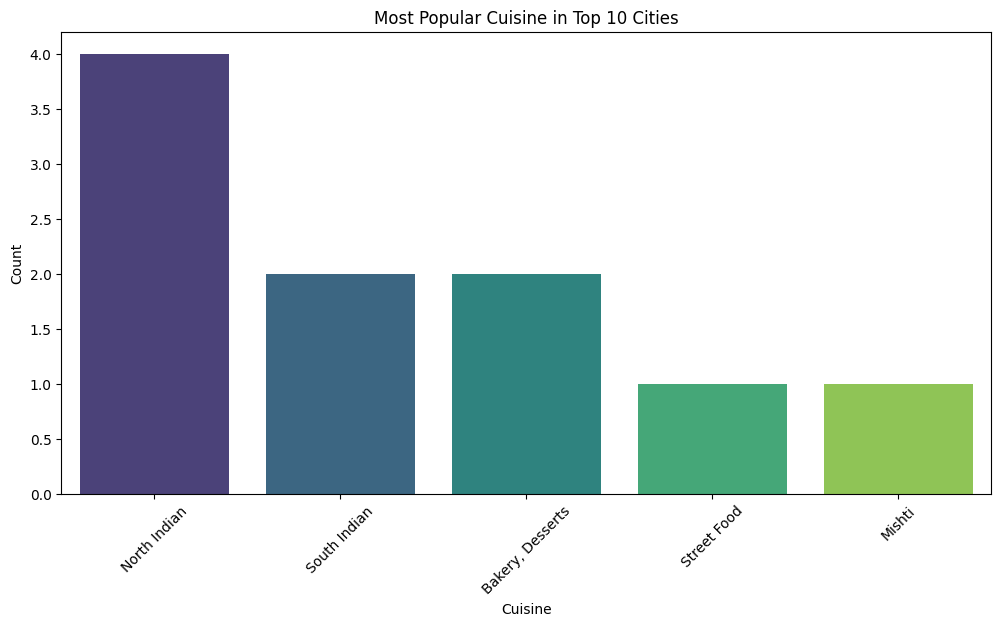

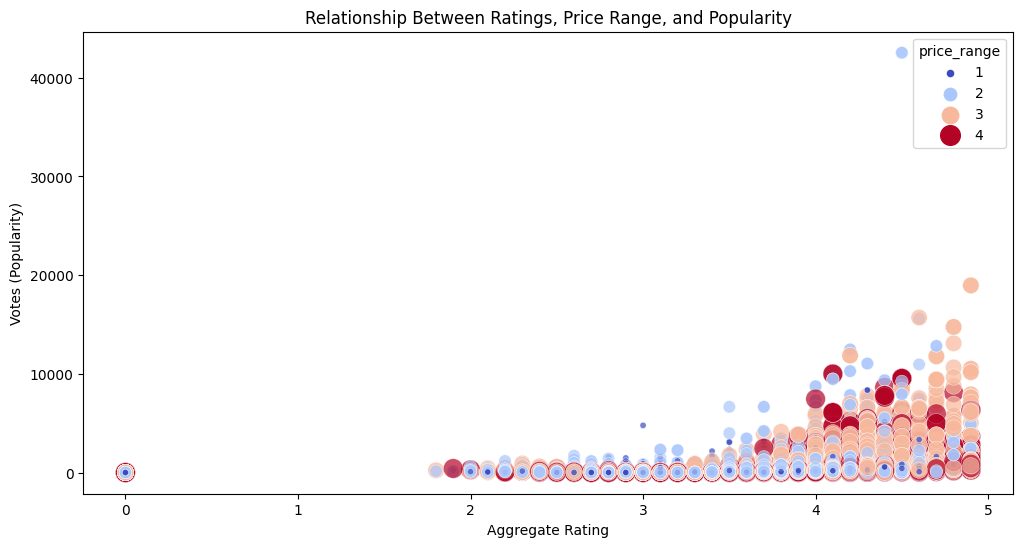

,city,cuisines
1,Ahmedabad,Street Food
8,Bangalore,South Indian
12,Chennai,South Indian
22,Goa,"Bakery, Desserts"
34,Jaipur,North Indian
46,Kolkata,Mishti
48,Lucknow,North Indian
56,Mumbai,"Bakery, Desserts"
66,New Delhi,North Indian
74,Pune,North Indian


from matplotlib import pyplot as plt
import seaborn as sns
popular_cuisine_top_cities.groupby('cuisines').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [16]:
# Analyzing Popular Cuisines in Different Regions

# Extracting the most popular cuisine in each city
popular_cuisine_by_city = zomato_cleaned.groupby('city')['cuisines'].agg(lambda x: x.value_counts().index[0]).reset_index()

# Relationship between Ratings, Price Range, and Popularity
# For popularity, we'll use the 'votes' as a proxy
rating_price_popularity = zomato_cleaned[['aggregate_rating', 'price_range', 'votes']]

# Visualization of popular cuisines in different cities (Top 10 cities)
top_10_cities_list = top_cities_detailed.index.tolist()
popular_cuisine_top_cities = popular_cuisine_by_city[popular_cuisine_by_city['city'].isin(top_10_cities_list)]

# plt.figure(figsize=(12, 6))
# sns.barplot(x='city', y='cuisines', data=popular_cuisine_top_cities, palette='viridis')
# plt.xticks(rotation=45)
# plt.title('Most Popular Cuisine in Top 10 Cities')
# plt.xlabel('City')
# plt.ylabel('Cuisine')

plt.figure(figsize=(12, 6))
sns.countplot(x='cuisines', data=popular_cuisine_top_cities, palette='viridis', order=popular_cuisine_top_cities['cuisines'].value_counts().index)
plt.xticks(rotation=45)
plt.title('Most Popular Cuisine in Top 10 Cities')
plt.xlabel('Cuisine')
plt.ylabel('Count')


# Scatter Plot for Relationship between Ratings, Price Range, and Popularity
plt.figure(figsize=(12, 6))
sns.scatterplot(data=rating_price_popularity, x='aggregate_rating', y='votes', hue='price_range', palette='coolwarm', size='price_range', sizes=(20, 200), alpha=0.7)
plt.title('Relationship Between Ratings, Price Range, and Popularity')
plt.xlabel('Aggregate Rating')
plt.ylabel('Votes (Popularity)')

plt.show()

# Displaying the popular cuisines in top cities
popular_cuisine_top_cities


In [10]:
# Correcting the Visualization for Popular Cuisines in Top Cities
# Since the data is not numeric, we'll use a different approach for visualization

# Displaying the popular cuisines in a table format
popular_cuisine_top_cities_table = popular_cuisine_top_cities.set_index('city')

# Displaying the corrected table
popular_cuisine_top_cities_table


,cuisines
city,
Ahmedabad,Street Food
Bangalore,South Indian
Chennai,South Indian
Goa,"Bakery, Desserts"
Jaipur,North Indian
Kolkata,Mishti
Lucknow,North Indian
Mumbai,"Bakery, Desserts"
New Delhi,North Indian


from matplotlib import pyplot as plt
import seaborn as sns
popular_cuisine_top_cities_table.groupby('cuisines').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [28]:
# Identifying Major Competitors in Each Region

# Selecting relevant columns for the analysis
competition_columns = ['city', 'name', 'cuisines', 'average_cost_for_two', 'price_range', 'aggregate_rating', 'votes']

# Filtering data for top cities
competitors_data = zomato_cleaned[competition_columns]
competitors_top_cities = competitors_data[competitors_data['city'].isin(top_10_cities_list)]

# Identifying major competitors in each city
# We'll consider restaurants with high ratings and a significant number of votes as major competitors
major_competitors = competitors_top_cities[competitors_top_cities['aggregate_rating'] >= 4.0]
major_competitors = major_competitors[major_competitors['votes'] > major_competitors['votes'].quantile(0.75)]


In [18]:
# Grouping by city to identify top competitors based on votes (popularity)
top_competitors_by_city = major_competitors.groupby(['city', 'name']).agg(
    Average_Rating=pd.NamedAgg(column='aggregate_rating', aggfunc='mean'),
    Average_Cost_for_Two=pd.NamedAgg(column='average_cost_for_two', aggfunc='mean'),
    Price_Range=pd.NamedAgg(column='price_range', aggfunc=lambda x: x.mode().iloc[0] if not x.mode().empty else None),
    Total_Votes=pd.NamedAgg(column='votes', aggfunc='sum'),
    Most_Common_Cuisine=pd.NamedAgg(column='cuisines', aggfunc=lambda x: x.value_counts().index[0])
).sort_values(by=['city', 'Total_Votes'], ascending=[True, False])

# Displaying top competitors for each city (Top 3 for demonstration)
top_competitors_by_city.groupby('city').head(3)


Average_Rating  \
city      name                                             
Ahmedabad Jassi De Parathe                      4.380000   
          Fozzie's Pizzaiolo. Cafe. Deli        4.200000   
          Kabir Restaurant                      4.000000   
Bangalore Onesta                                4.393750   
          Empire Restaurant                     4.158333   
          Byg Brewski Brewing Company           4.800000   
Chennai   Coal Barbecues                        4.900000   
          AB's - Absolute Barbecues             4.883333   
          Copper Kitchen                        4.388889   
Goa       Thalassa                              4.400000   
          Britto's Bar & Restaurant             4.400000   
          The Black Sheep Bistro                4.800000   
Jaipur    Agarwal Caterers                      4.400000   
          RJ 14                                 4.400000   
          Skyfall By Replay                     4.600000   
Kolkata   Peter Cat                             4.200000   
          Chili's Grill & Bar                   4.675000   
          Oudh 1590                             4.433333   
Lucknow   Tunday Kababi                         4.640000   
          Dastarkhwan                           4.700000   
          Mubeen's                              4.400000   
Mumbai    Colaba Social                         4.700000   
          Tea Villa Cafe                        4.253333   
          Chili's American Grill & Bar          4.400000   
New Delhi Lord Of The Drinks                    4.500000   
          Hauz Khas Social                      4.800000   
          Saravana Bhavan                       4.350000   
Pune      Agent Jack's                          4.540000   
          Cafe Goodluck                         4.200000   
          Culture - पुणे                        4.300000   

                                          Average_Cost_for_Two  Price_Range  \
city      name                                                                
Ahmedabad Jassi De Parathe                               710.0            3   
          Fozzie's Pizzaiolo. Cafe. Deli                 900.0            3   
          Kabir Restaurant                               600.0            2   
Bangalore Onesta                                         600.0            2   
          Empire Restaurant                              500.0            2   
          Byg Brewski Brewing Company                   1600.0            3   
Chennai   Coal Barbecues                                1400.0            3   
          AB's - Absolute Barbecues                     1400.0            3   
          Copper Kitchen                                 800.0            2   
Goa       Thalassa                                      2000.0            4   
          Britto's Bar & Restaurant                     1400.0            4   
          The Black Sheep Bistro                        1500.0            4   
Jaipur    Agarwal Caterers                               350.0            1   
          RJ 14                                         1000.0            3   
          Skyfall By Replay                             1500.0            3   
Kolkata   Peter Cat                                     1200.0            3   
          Chili's Grill & Bar                           1700.0            3   
          Oudh 1590                                     1200.0            3   
Lucknow   Tunday Kababi                                  300.0            1   
          Dastarkhwan                                    600.0            2   
          Mubeen's                                       300.0            1   
Mumbai    Colaba Social                                 1400.0            3   
          Tea Villa Cafe                                1000.0            3   
          Chili's American Grill & Bar                  2500.0            4   
New Delhi Lord Of The Drinks                            2500.0     

In [22]:
# Check the column names and data types in top_competitors_by_city
print(top_competitors_by_city.dtypes)
print(top_competitors_by_city.head())


# Resetting the index to make 'city' a regular column
top_competitors_by_city = top_competitors_by_city.reset_index()


Average_Rating          float64
Average_Cost_for_Two    float64
Price_Range               int64
Total_Votes               int64
Most_Common_Cuisine      object
dtype: object
                                          Average_Rating  \
city      name                                             
Ahmedabad Jassi De Parathe                          4.38   
          Fozzie's Pizzaiolo. Cafe. Deli            4.20   
          Kabir Restaurant                          4.00   
          The Cafe Baraco                           4.20   
          La Pino'z Pizza                           4.50   

                                          Average_Cost_for_Two  Price_Range  \
city      name                                                                
Ahmedabad Jassi De Parathe                               710.0            3   
          Fozzie's Pizzaiolo. Cafe. Deli                 900.0            3   
          Kabir Restaurant                               600.0            2   
          

<ipython-input-23-9207d70b4931>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='city', y='Average_Rating', data=top_competitors_by_city, ci=None, palette='viridis')


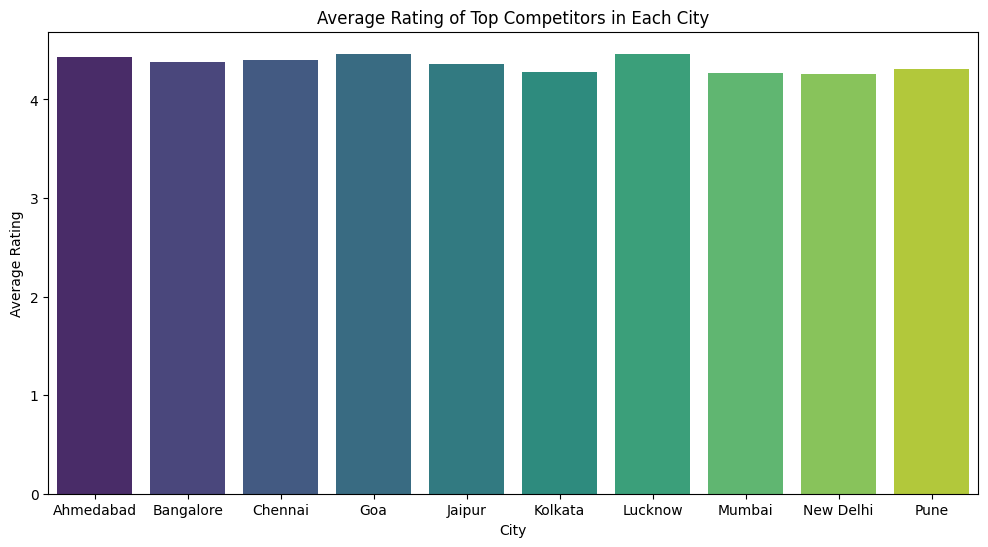

In [23]:
plt.figure(figsize=(12, 6))
sns.barplot(x='city', y='Average_Rating', data=top_competitors_by_city, ci=None, palette='viridis')
plt.title('Average Rating of Top Competitors in Each City')
plt.xlabel('City')
plt.ylabel('Average Rating')
plt.show()

<ipython-input-24-0865baa3370d>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='city', y='Total_Votes', data=top_competitors_by_city, ci=None, palette='viridis')


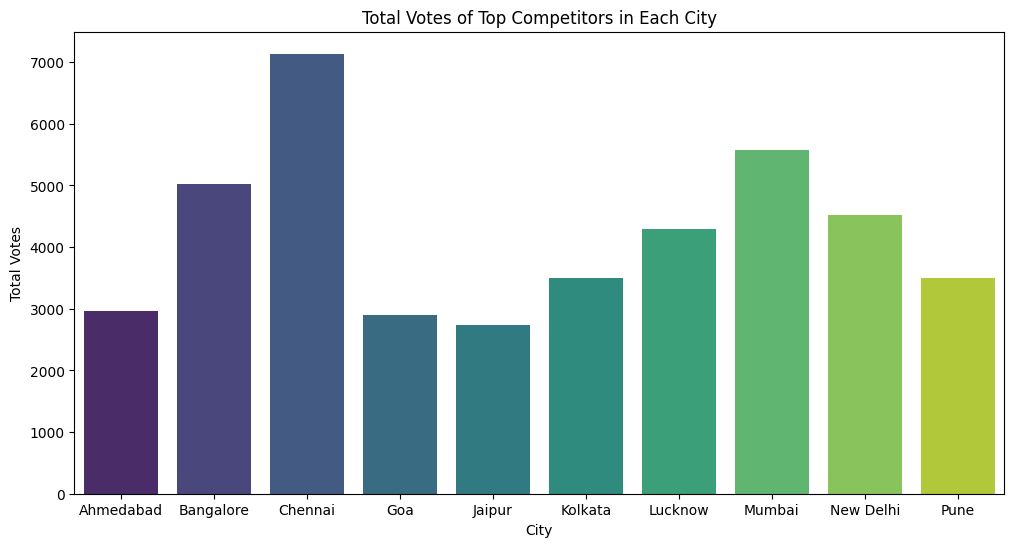

In [24]:
plt.figure(figsize=(12, 6))
sns.barplot(x='city', y='Total_Votes', data=top_competitors_by_city, ci=None, palette='viridis')
plt.title('Total Votes of Top Competitors in Each City')
plt.xlabel('City')
plt.ylabel('Total Votes')
plt.show()


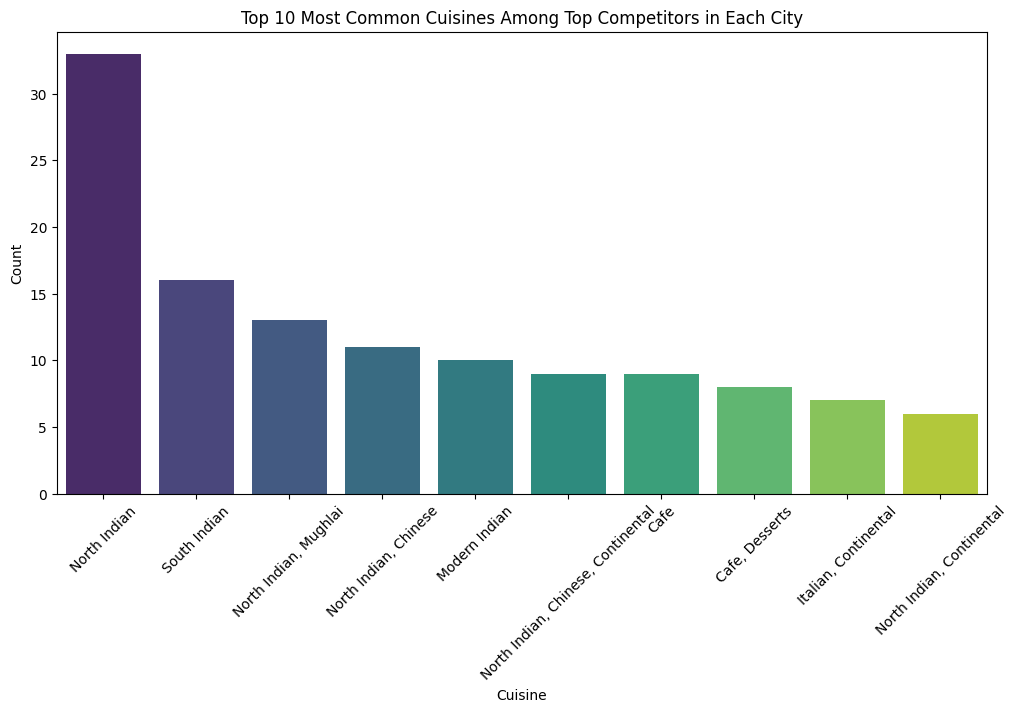

In [27]:
# Selecting the top 20 most common cuisines
top_cuisines = top_competitors_by_city['Most_Common_Cuisine'].value_counts().nlargest(10).index

# Filtering the DataFrame for the top 20 cuisines
top_competitors_by_city_top_cuisines = top_competitors_by_city[top_competitors_by_city['Most_Common_Cuisine'].isin(top_cuisines)]

# Visualize the top 20 most common cuisines
plt.figure(figsize=(12, 6))
sns.countplot(x='Most_Common_Cuisine', data=top_competitors_by_city_top_cuisines, order=top_cuisines, palette='viridis')
plt.title('Top 10 Most Common Cuisines Among Top Competitors in Each City')
plt.xlabel('Cuisine')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()



In [12]:
# Correcting the aggregation for 'price_range'
# Using a custom function to determine the most frequent value (mode) in 'price_range'
def most_frequent(series):
    return series.value_counts().idxmax()

# Reapplying the corrected aggregation
top_competitors_by_city_corrected = major_competitors.groupby(['city', 'name']).agg(
    Average_Rating=pd.NamedAgg(column='aggregate_rating', aggfunc='mean'),
    Average_Cost_for_Two=pd.NamedAgg(column='average_cost_for_two', aggfunc='mean'),
    Most_Common_Price_Range=pd.NamedAgg(column='price_range', aggfunc=most_frequent),
    Total_Votes=pd.NamedAgg(column='votes', aggfunc='sum'),
    Most_Common_Cuisine=pd.NamedAgg(column='cuisines', aggfunc=lambda x:x.value_counts().index[0])
).sort_values(by=['city', 'Total_Votes'], ascending=[True, False])

# Displaying top competitors for each city (Top 3 for demonstration)
top_competitors_by_city_corrected.groupby('city').head(3)


Average_Rating  \
city      name                                             
Ahmedabad Jassi De Parathe                      4.380000   
          Fozzie's Pizzaiolo. Cafe. Deli        4.200000   
          Kabir Restaurant                      4.000000   
Bangalore Onesta                                4.393750   
          Empire Restaurant                     4.158333   
          Byg Brewski Brewing Company           4.800000   
Chennai   Coal Barbecues                        4.900000   
          AB's - Absolute Barbecues             4.883333   
          Copper Kitchen                        4.388889   
Goa       Thalassa                              4.400000   
          Britto's Bar & Restaurant             4.400000   
          The Black Sheep Bistro                4.800000   
Jaipur    Agarwal Caterers                      4.400000   
          RJ 14                                 4.400000   
          Skyfall By Replay                     4.600000   
Kolkata   Peter Cat                             4.200000   
          Chili's Grill & Bar                   4.675000   
          Oudh 1590                             4.433333   
Lucknow   Tunday Kababi                         4.640000   
          Dastarkhwan                           4.700000   
          Mubeen's                              4.400000   
Mumbai    Colaba Social                         4.700000   
          Tea Villa Cafe                        4.253333   
          Chili's American Grill & Bar          4.400000   
New Delhi Lord Of The Drinks                    4.500000   
          Hauz Khas Social                      4.800000   
          Saravana Bhavan                       4.350000   
Pune      Agent Jack's                          4.540000   
          Cafe Goodluck                         4.200000   
          Culture - पुणे                        4.300000   

                                          Average_Cost_for_Two  \
city      name                                                   
Ahmedabad Jassi De Parathe                               710.0   
          Fozzie's Pizzaiolo. Cafe. Deli                 900.0   
          Kabir Restaurant                               600.0   
Bangalore Onesta                                         600.0   
          Empire Restaurant                              500.0   
          Byg Brewski Brewing Company                   1600.0   
Chennai   Coal Barbecues                                1400.0   
          AB's - Absolute Barbecues                     1400.0   
          Copper Kitchen                                 800.0   
Goa       Thalassa                                      2000.0   
          Britto's Bar & Restaurant                     1400.0   
          The Black Sheep Bistro                        1500.0   
Jaipur    Agarwal Caterers                               350.0   
          RJ 14                                         1000.0   
          Skyfall By Replay                             1500.0   
Kolkata   Peter Cat                                     1200.0   
          Chili's Grill & Bar                           1700.0   
          Oudh 1590                                     1200.0   
Lucknow   Tunday Kababi                                  300.0   
          Dastarkhwan                                    600.0   
          Mubeen's                                       300.0   
Mumbai    Colaba Social                                 1400.0   
          Tea Villa Cafe                                1000.0   
          Chili's American Grill & Bar                  2500.0   
New Delhi Lord Of The Drinks                            2500.0   
          Hauz Khas Social                              1300.0   
          Saravana Bhavan                                500.0   
Pune      Agent Jack's                                  1300.0   
          Cafe Goodluck                                  600.0   
          Culture - पुणे                                1300.0   

        

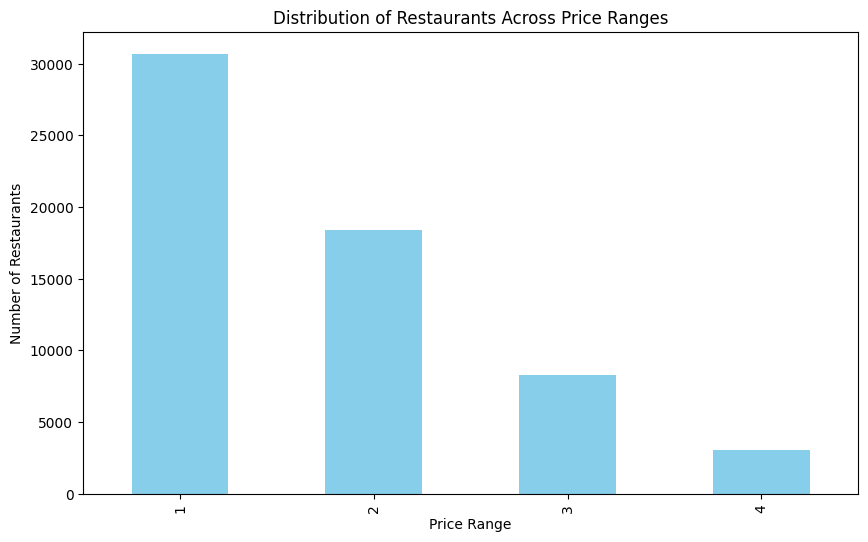

(Series([], Name: cuisines, dtype: int64),
 1    30676
 2    18377
 3     8300
 4     3058
 Name: price_range, dtype: int64)

In [13]:
# Market Gap Analysis

# Underrepresented Cuisines
# Finding the frequency of each cuisine in the dataset
cuisine_counts = zomato_cleaned['cuisines'].value_counts()

# Identifying cuisines that are less common (appearing less frequently in the dataset)
underrepresented_cuisines = cuisine_counts[cuisine_counts < cuisine_counts.quantile(0.25)]

# Price Range Gaps
# Analyzing the distribution of restaurants across different price ranges
price_range_distribution = zomato_cleaned['price_range'].value_counts().sort_index()

# Visualization of Price Range Distribution
plt.figure(figsize=(10, 6))
price_range_distribution.plot(kind='bar', color='skyblue')
plt.title('Distribution of Restaurants Across Price Ranges')
plt.xlabel('Price Range')
plt.ylabel('Number of Restaurants')
plt.show()

underrepresented_cuisines.head(10), price_range_distribution
